In [ ]:
!pip install -r requirements.txt

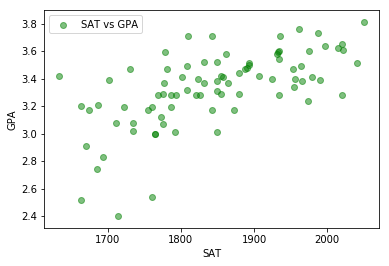

In [30]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

df = pd.read_csv('../data/sat_gpa.csv')

sat = df['SAT']
gpa = df['GPA']

plt.scatter(sat, gpa,c="g", alpha=0.5, label="SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.legend(loc='upper left')
plt.show()


In [35]:
import torch.nn

# convert data to tensors
y_data = torch.tensor(df['SAT'].values.reshape(-1,1))
x_data = torch.tensor(df['GPA'].values.reshape(-1,1))


# build model
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 


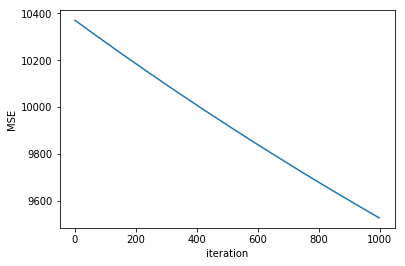

In [37]:
losses = []
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_data.float())
    # Compute Loss
    loss = criterion(y_pred.float(), y_data.float())
    losses.append(loss)
    # Backward pass
    loss.backward()
    optimizer.step()


plt.plot(losses, label="Loss (MSE)")
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.show()


In [38]:
new_x = torch.Tensor([[3.5]])
y_pred = model(new_x)



# print(y_pred)
# plt.scatter(gpa,sat, c="g", alpha=0.5, label="SAT vs GPA")
# plt.scatter(new_x.detach().numpy(),y_pred.detach().numpy(),  c="r")
# plt.xlabel("SAT")
# plt.ylabel("GPA")
# plt.legend(loc='upper left')
# plt.show()


In [39]:
# different ways to print weights (results) 

for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

for param in model.parameters():
    print(param.data)


# weight 
w= list(model.parameters())[0].data.numpy()[0]

# bias
b = list(model.parameters())[1].data.numpy()[0]

weight tensor([[451.3085]])
bias tensor([338.1691])
tensor([[451.3085]])
tensor([338.1691])


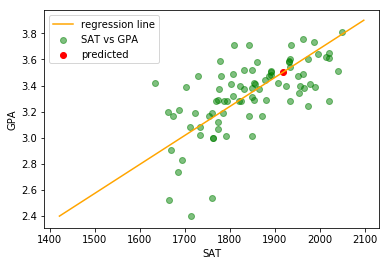

In [40]:
# creating line for y = w*x + b

xt = np.arange(2.4, 4, 0.1)
yt = [w * x + b for x in xt]


# prediction of y given x
new_x = torch.Tensor([[3.5]])
y_pred = model(new_x)


# graph raw data
plt.scatter(sat, gpa,c="g", alpha=0.5, label="SAT vs GPA")

# graph line
plt.plot(yt, xt, c="orange", label="regression line")

# graph predicted point
plt.scatter(y_pred.detach().numpy(), new_x.detach().numpy(), c="r", label="predicted")


plt.xlabel("SAT")
plt.ylabel("GPA")
plt.legend(loc='upper left')

plt.show()
